In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       # analysis tool
from sklearn.model_selection import train_test_split

In [0]:
# Prepare dataset

cars_customers_data = spark.read.table("default.new_cleaned_carscustomer_data_pradeep")

df_table=cars_customers_data.toPandas()
df = pd.DataFrame(df_table)
df.head()

#print("Dataset", df)

,TotalChildren,NumberChildrenAtHome,NumberOfPurchases,ProfitGenerated,Age,MaritalStatus_ S,YearlyIncome_ 25001-50000,YearlyIncome_ 50001-75000,YearlyIncome_ 75001-100000,YearlyIncome_ greater than 100000,Gender_ M,Education_ Graduate Degree,Education_ High School,Education_ Partial College,Education_ Partial High School,Occupation_ Management,Occupation_ Manual,Occupation_ Professional,Occupation_ Skilled Manual,HomeOwner_ True,CommuteDistance_ 1-2 Miles,CommuteDistance_ 10+ Miles,CommuteDistance_ 2-5 Miles,CommuteDistance_ 5-10 Miles
0,1.705840,2.554599,2.753732,-0.239634,-0.658761,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,-1.207835,-0.704899,-1.253591,1.456773,-0.405635,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0.540370,1.250800,-0.251760,-0.365055,-0.321260,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.123105,1.902699,0.750071,0.448947,-0.321260,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,-1.207835,-0.704899,-1.253591,1.714110,-0.321260,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
df.columns
df.columns = df.columns.str.replace(' ', '', regex=False)
df.head()

,TotalChildren,NumberChildrenAtHome,NumberOfPurchases,ProfitGenerated,Age,MaritalStatus_S,YearlyIncome_25001-50000,YearlyIncome_50001-75000,YearlyIncome_75001-100000,YearlyIncome_greaterthan100000,Gender_M,Education_GraduateDegree,Education_HighSchool,Education_PartialCollege,Education_PartialHighSchool,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_SkilledManual,HomeOwner_True,CommuteDistance_1-2Miles,CommuteDistance_10+Miles,CommuteDistance_2-5Miles,CommuteDistance_5-10Miles
0,1.705840,2.554599,2.753732,-0.239634,-0.658761,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,-1.207835,-0.704899,-1.253591,1.456773,-0.405635,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0.540370,1.250800,-0.251760,-0.365055,-0.321260,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.123105,1.902699,0.750071,0.448947,-0.321260,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,-1.207835,-0.704899,-1.253591,1.714110,-0.321260,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
y = df['YearlyIncome_25001-50000']
X = df.drop(['YearlyIncome_25001-50000'], axis=1)

print(X)

      TotalChildren  ...  CommuteDistance_5-10Miles
0          1.705840  ...                          0
1         -1.207835  ...                          1
2          0.540370  ...                          0
3          1.123105  ...                          0
4         -1.207835  ...                          1
...             ...  ...                        ...
9995      -1.207835  ...                          0
9996      -1.207835  ...                          0
9997      -0.625100  ...                          0
9998      -0.625100  ...                          0
9999      -0.042365  ...                          0

[10000 rows x 23 columns]


In [0]:
#y = df['NumberOfPurchases']
#.values.reshape(-1, 1)
#X = df.drop(['NumberOfPurchases'], axis=1)
#X = df[['NumberChildrenAtHome', 'TotalChildren', 'BirthDate', 'YearlyIncome']]
#X = df[['NumberChildrenAtHome', 'TotalChildren', 'BirthDate', 'YearlyIncome', 'Education', 'CommuteDistance',   'HomeOwner', 'Occupation' ]]

In [0]:
# Train and split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 20, criterion= 'entropy', random_state = 0)
Classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [0]:
# Predict the new result

y_pred = Classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y.values.reshape(-1,1), y.values.reshape(-1,1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


9394    0
898     0
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: YearlyIncome_25001-50000, Length: 2000, dtype: int64


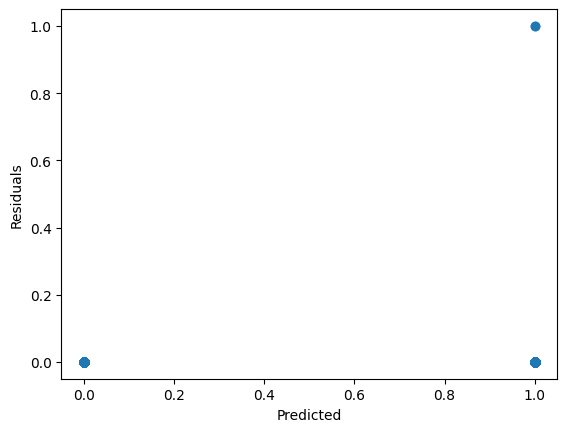

R2 Score: 0.9948904251677217
Adjusted R2 Score: 0.994830951371597


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

residuals = y_test - y_pred

print(residuals)
plt.scatter(y_test, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("R2 Score:", r2_score(y_test, y_pred))
print("Adjusted R2 Score:", adjusted_r2)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.reshape(len(y_pred),1))
print(cm)
#Accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred.reshape(len(y_pred),1)))

# precision of the model
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred.reshape(len(y_pred),1)))

# recall of the model
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred.reshape(len(y_pred),1)))

[[1466    0]
 [   2  532]]
0.999
1.0
0.9962546816479401


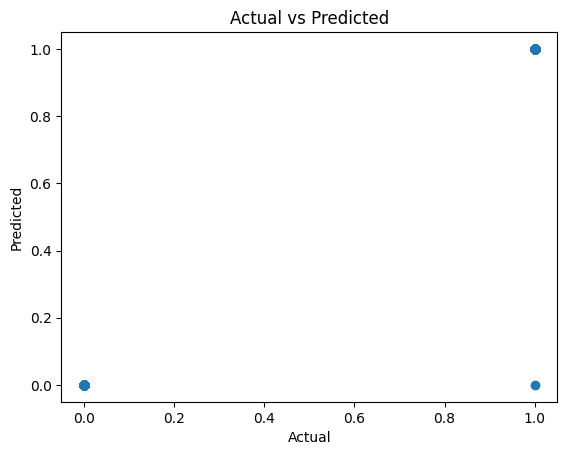

In [0]:
# Graphical representation of the model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()